In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
histogram_raw = np.loadtxt("subsystem_fock_state_histogram_0.000000.dat")
histogram_raw_with_swap = np.loadtxt("subsystem_fock_state_histogram_0.000000_withSWAP.dat")
histogram_raw_with_swap

array([1358133.,  860888.,  227558.,  230138.,  860960.,   40835.,
          7826.,   18021.,    9699.,   42905.,   20980.,   19502.,
         18530.,  157577.])

In [29]:
subsystem_fock_states = ['0000','1010','1001','0110','0101','0202','0220','0211','2002','2020','2011','1102','1120','1111']

In [39]:
swappables = np.zeros_like(histogram_raw)
non_swappables = np.zeros_like(histogram_raw)

swappables_with_swap = np.zeros_like(histogram_raw_with_swap)
non_swappables_with_swap = np.zeros_like(histogram_raw_with_swap)

In [40]:
swappables[0] = histogram_raw[0]
swappables[1] = histogram_raw[1]
swappables[4] = histogram_raw[4]
swappables[5] = histogram_raw[5]
swappables[9] = histogram_raw[9]
swappables[13] = histogram_raw[13]

swappables_with_swap[0] = histogram_raw_with_swap[0]
swappables_with_swap[1] = histogram_raw_with_swap[1]
swappables_with_swap[4] = histogram_raw_with_swap[4]
swappables_with_swap[5] = histogram_raw_with_swap[5]
swappables_with_swap[9] = histogram_raw_with_swap[9]
swappables_with_swap[13] = histogram_raw_with_swap[13]

In [41]:
non_swappables[2] = histogram_raw[2]
non_swappables[3] = histogram_raw[3]
non_swappables[6] = histogram_raw[6]
non_swappables[7] = histogram_raw[7]
non_swappables[8] = histogram_raw[8]
non_swappables[10] = histogram_raw[10]
non_swappables[11] = histogram_raw[11]
non_swappables[12] = histogram_raw[12]

non_swappables_with_swap[2] = histogram_raw_with_swap[2]
non_swappables_with_swap[3] = histogram_raw_with_swap[3]
non_swappables_with_swap[6] = histogram_raw_with_swap[6]
non_swappables_with_swap[7] = histogram_raw_with_swap[7]
non_swappables_with_swap[8] = histogram_raw_with_swap[8]
non_swappables_with_swap[10] = histogram_raw_with_swap[10]
non_swappables_with_swap[11] = histogram_raw_with_swap[11]
non_swappables_with_swap[12] = histogram_raw_with_swap[12]

In [56]:
# Normalize
norm = np.sum(histogram_raw)
norm_with_swap = np.sum(histogram_raw_with_swap)

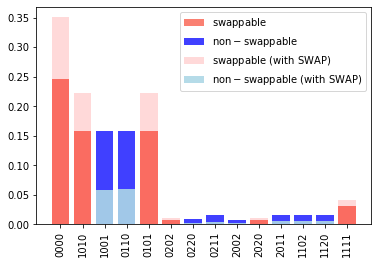

In [75]:
# plt.bar(range(len(histogram_raw)),histogram_raw,tick_label=subsystem_fock_states)
plt.bar(range(len(histogram_raw)),swappables/norm,tick_label=subsystem_fock_states,label=r'$\rm{swappable}$',color='salmon')
plt.bar(range(len(histogram_raw)),non_swappables/norm,tick_label=subsystem_fock_states,label=r'$\rm{non-swappable}$',color='blue',alpha=0.75)
plt.bar(range(len(histogram_raw)),swappables_with_swap/norm_with_swap,tick_label=subsystem_fock_states,label=r'$\rm{swappable}$ (with SWAP) ',color='red',alpha=0.15,zorder=10)
plt.bar(range(len(histogram_raw)),non_swappables_with_swap/norm_with_swap,tick_label=subsystem_fock_states,label=r'$\rm{non-swappable}$ (with SWAP)',color='lightblue',alpha=0.9,zorder=10)
plt.xticks(rotation='vertical')
plt.legend(loc='best')
plt.savefig("subsystem_fock_states_histogram_combined.png")

In [58]:
np.sum(histogram_raw/norm)

1.0

In [59]:
np.sum(histogram_raw_with_swap/norm_with_swap)

0.9999999999999999

In [78]:
swappable_probs = [8/32,8/32,8/32,2/32,2/32, 4/32]
sum(swappable_probs)

# THIS IS ONLY FOR ONE REPLICA

# the non-interacting system state is the tensor of both

# Do this for the replica, then do the tensor with replica and get probability of joint subsytem fock state

# Might be too many terms to do by hand. Try and do it with a script.

# Once we have these, let's get the exact histogram from the joint wavefunction

# Compare PIMC (without SWAP) with Wavefunction histogram and check they're the same

1.0